# Recommender system

### Library import

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
movies = "../lab_data/movies.csv"
ratings = "../lab_data/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings = pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})

### EDA

#### Info and describe

In [4]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [6]:
df_movies.info(), df_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB


(None,
              movieId
 count   58098.000000
 mean   111919.516197
 std     59862.660956
 min         1.000000
 25%     72437.750000
 50%    126549.000000
 75%    161449.500000
 max    193886.000000)

In [7]:
df_ratings.info(), df_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


(None,
              userId       movieId        rating
 count  2.775344e+07  2.775344e+07  2.775344e+07
 mean   1.419420e+05  1.848800e+04  3.530446e+00
 std    8.170740e+04  3.510263e+04  1.066353e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    7.117600e+04  1.097000e+03  3.000000e+00
 50%    1.420220e+05  2.716000e+03  3.500000e+00
 75%    2.124590e+05  7.150000e+03  4.000000e+00
 max    2.832280e+05  1.938860e+05  5.000000e+00)

#### Sorted ratings

<AxesSubplot:xlabel='title', ylabel='Number of ratings'>

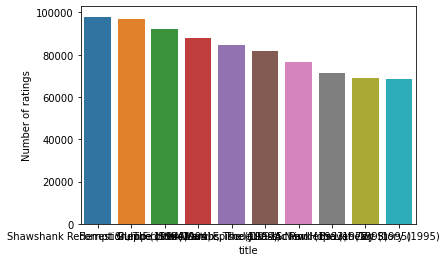

In [86]:
## Code insperation taken from https://datatofish.com/count-duplicates-pandas/
df = df_ratings.pivot_table(columns=["movieId"], aggfunc="size").to_frame()
df = df.reset_index()
df = df.rename({0: "Number of ratings"}, axis = "columns")
df = df.sort_values(ascending = False, by = "Number of ratings")
ten_most_rated_movieId = df["movieId"].head(10).to_list()
ten_most_rated_movies = df_movies[df_movies["movieId"].isin(ten_most_rated_movieId)]
ten_most_rated_movies
most_rated_movies = pd.concat([df["Number of ratings"].head(10), ten_most_rated_movies["title"]], axis=1)
sns.barplot(data = most_rated_movies, x="title", y="Number of ratings")

#### Plot for movies per year

In [ ]:
## Sort out movies per decade